Coefficients: [-0.04719763 -0.09205012 -0.17475958 -0.1623449   0.0377273  -0.04858991
  0.01553657  0.2022505  -0.01214083 -0.01731579 -0.01669767  0.
  0.00055883  0.          0.00065501 -0.00274843]
Intercept: 5.3995332532367115
Mean Absolute Error: 51.72353487314306
Mean Squared Error: 5282.049744004888
Root Mean Squared Error: 72.67771146647979


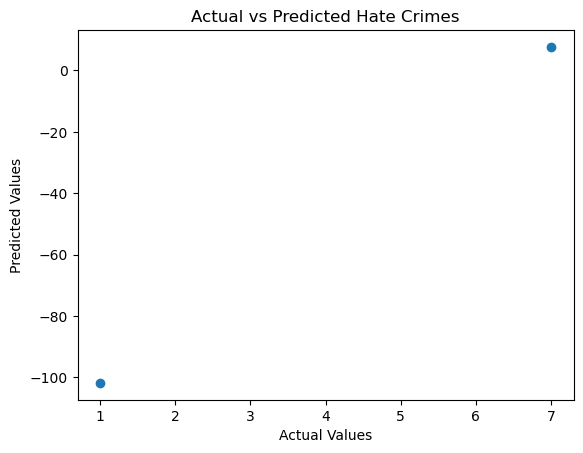

Mean Absolute Error (Decision Tree): 1.5
Mean Absolute Error (Random Forest): 1.5099999999999998
Mean Absolute Error (SVM): 2.1846019152950156


C:\Users\sahar\AppData\Local\Temp\ipykernel_26688\778506215.py:82: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  rf_model.fit(X_train, y_train.ravel())
C:\Users\sahar\AppData\Local\Temp\ipykernel_26688\778506215.py:103: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  svm_model.fit(X_train_scaled, y_train.ravel())
C:\Users\sahar\AppData\Local\Temp\ipykernel_26688\778506215.py:126: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  nn_model.fit(X_train_scaled_nn, y_train.ravel())


Mean Absolute Error (Neural Network): 1.3094771946251555


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Create a DataFrame with your data
data = {
    'Type of motivation': ['Race or ethnicity', 'Religion', 'Sexual orientation', 'Language', 'Disability', 'Sex and gender', 'Age', 'Other similar factor', 'Unknown motivation'],
    2014: [611, 429, 155, 12, 10, 22, 6, 10, 23],
    2015: [641, 469, 141, 18, 8, 12, 4, 27, 25],
    2016: [666, 460, 176, 13, 11, 24, 5, 44, 19],
    2017: [878, 842, 204, 23, 10, 32, 4, 35, 32],
    2018: [793, 657, 186, 14, 9, 54, 9, 48, 22],
    2019: [884, 613, 265, 25, 3, 56, 8, 73, 39],
    2020: [1619, 530, 258, 37, 8, 49, 5, 58, 39],
    2021: [1745, 886, 438, 33, 16, 60, 14, 101, 81],
    2022: [1950, 750, 491, 59, 15, 89, 7, 82, 117]
}

df = pd.DataFrame(data)

# One-hot encode the 'Type of motivation' column
df_encoded = pd.get_dummies(df, columns=['Type of motivation'], drop_first=True)

# Extract the years as the target variable
y = df_encoded.index.astype(int)

# Prepare the data for training and testing
X = df_encoded.drop(columns='Type of motivation_Unknown motivation').values  # Exclude 'Unknown motivation' from features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Hate Crimes')
plt.show()


from sklearn.tree import DecisionTreeRegressor

# Create a decision tree model
tree_model = DecisionTreeRegressor()

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
tree_y_pred = tree_model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error (Decision Tree):', metrics.mean_absolute_error(y_test, tree_y_pred))


from sklearn.ensemble import RandomForestRegressor

# Create a random forest model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train.ravel())

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error (Random Forest):', metrics.mean_absolute_error(y_test, rf_y_pred))


from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model
svm_model = SVR()

# Train the model
svm_model.fit(X_train_scaled, y_train.ravel())

# Make predictions on the scaled test set
svm_y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print('Mean Absolute Error (SVM):', metrics.mean_absolute_error(y_test, svm_y_pred))




from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

# Scale the features for neural networks
scaler_nn = MinMaxScaler()
X_train_scaled_nn = scaler_nn.fit_transform(X_train)
X_test_scaled_nn = scaler_nn.transform(X_test)

# Create a neural network model
nn_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)

# Train the model
nn_model.fit(X_train_scaled_nn, y_train.ravel())

# Make predictions on the scaled test set
nn_y_pred = nn_model.predict(X_test_scaled_nn)

# Evaluate the model
print('Mean Absolute Error (Neural Network):', metrics.mean_absolute_error(y_test, nn_y_pred))





In [79]:
import pandas as pd

# Assuming you have new data for the years 2023 and beyond
# Assuming you have new data for the years 2023 and beyond
new_data = {
    'Type of motivation': ['Race or ethnicity', 'Religion', 'Sexual orientation', 'Language', 'Disability', 'Sex and gender', 'Age', 'Other similar factor', 'Unknown motivation'],
    2023: [700, 500, 180, 25, 15, 60, 10, 90, 120],  # Replace with your actual values
    2024: [750, 550, 200, 28, 18, 65, 12, 95, 130],  # Replace with your actual values
    # Add more years as needed
}

# Continue with the rest of the code to make predictions on the new data


# Create a DataFrame for the new data
new_df = pd.DataFrame(new_data)

# One-hot encode the 'Type of motivation' column
new_df_encoded = pd.get_dummies(new_df, columns=['Type of motivation'], drop_first=True)

# Ensure the columns in new_df_encoded match the columns used during training
missing_columns = set(df_encoded.columns) - set(new_df_encoded.columns)
for col in missing_columns:
    new_df_encoded[col] = 0

# Ensure the order of columns is the same
new_df_encoded = new_df_encoded[df_encoded.drop(columns='Type of motivation_Unknown motivation').columns]

# Make predictions on the new data
new_predictions = model.predict(new_df_encoded.values)

# Print or use the new predictions
print('Predictions for 2023 and beyond:', new_predictions)


Predictions for 2023 and beyond: [5.40009208 5.39953325 5.39678482 5.38283559 5.38221746 5.40018826
 5.39953325 5.39953325 5.39953325]


In [15]:

import pandas as pd

# Assuming you have new data for the years 2023 and beyond
# Assuming you have new data for the years 2023 and beyond
new_data = {
    'Type of motivation': ['Race or ethnicity', 'Religion', 'Sexual orientation', 'Language', 'Disability', 'Sex and gender', 'Age', 'Other similar factor', 'Unknown motivation'],
    2023: [700, 500, 180, 25, 15, 60, 10, 90, 120],  # Replace with your actual values
    2024: [750, 550, 200, 28, 18, 65, 12, 95, 130],  # Replace with your actual values
    # Add more years as needed
}

new_df = pd.DataFrame(new_data)

# One-hot encode the 'Type of motivation' column
new_df_encoded = pd.get_dummies(new_df, columns=['Type of motivation'], drop_first=True)

# Ensure the columns in new_df_encoded match the columns used during training
missing_columns = set(df_encoded.columns) - set(new_df_encoded.columns)
for col in missing_columns:
    new_df_encoded[col] = 0

# Ensure the order of columns is the same
new_df_encoded = new_df_encoded[df_encoded.drop(columns='Type of motivation_Unknown motivation').columns]

# Make predictions on the new data
new_predictions = model.predict(new_df_encoded.values)

# Display the predictions for the next 10 years
for year, prediction in zip(range(2023, 2033), new_predictions):
    print(f'Predicted hate crime for {year}: {prediction}')

Predicted hate crime for 2023: 5.4000920814557
Predicted hate crime for 2024: 5.3995332532367115
Predicted hate crime for 2025: 5.396784819515936
Predicted hate crime for 2026: 5.382835586981297
Predicted hate crime for 2027: 5.382217459564865
Predicted hate crime for 2028: 5.400188258751411
Predicted hate crime for 2029: 5.3995332532367115
Predicted hate crime for 2030: 5.3995332532367115
Predicted hate crime for 2031: 5.3995332532367115


In [80]:
import pandas as pd

# Assuming you have new data for the years 2023 and beyond
# Assuming you have new data for the years 2023 and beyond
new_data = {
    'Type of motivation': ['Race or ethnicity', 'Religion', 'Sexual orientation', 'Language', 'Disability', 'Sex and gender', 'Age', 'Other similar factor', 'Unknown motivation'],
    2023: [700, 500, 180, 25, 15, 60, 10, 90, 120],  # Replace with your actual values
    2024: [750, 550, 200, 28, 18, 65, 12, 95, 130],  # Replace with your actual values
    # Add more years as needed
}
# Create a DataFrame for the new data
new_df = pd.DataFrame(new_data)

# One-hot encode the 'Type of motivation' column
new_df_encoded = pd.get_dummies(new_df, columns=['Type of motivation'], drop_first=True)

# Ensure the columns in new_df_encoded match the columns used during training
missing_columns = set(df_encoded.columns) - set(new_df_encoded.columns)
for col in missing_columns:
    new_df_encoded[col] = 0

# Ensure the order of columns is the same
new_df_encoded = new_df_encoded[df_encoded.drop(columns='Type of motivation_Unknown motivation').columns]

# Make predictions on the new data
new_predictions = model.predict(new_df_encoded.values)

# Display the predictions for the next 10 years (up to 2042)
for year, prediction in zip(range(2033, 2043), new_predictions):
    print(f'Predicted hate crime for {year}: {prediction}')

Predicted hate crime for 2033: 5.4000920814557
Predicted hate crime for 2034: 5.3995332532367115
Predicted hate crime for 2035: 5.396784819515936
Predicted hate crime for 2036: 5.382835586981297
Predicted hate crime for 2037: 5.382217459564865
Predicted hate crime for 2038: 5.400188258751411
Predicted hate crime for 2039: 5.3995332532367115
Predicted hate crime for 2040: 5.3995332532367115
Predicted hate crime for 2041: 5.3995332532367115


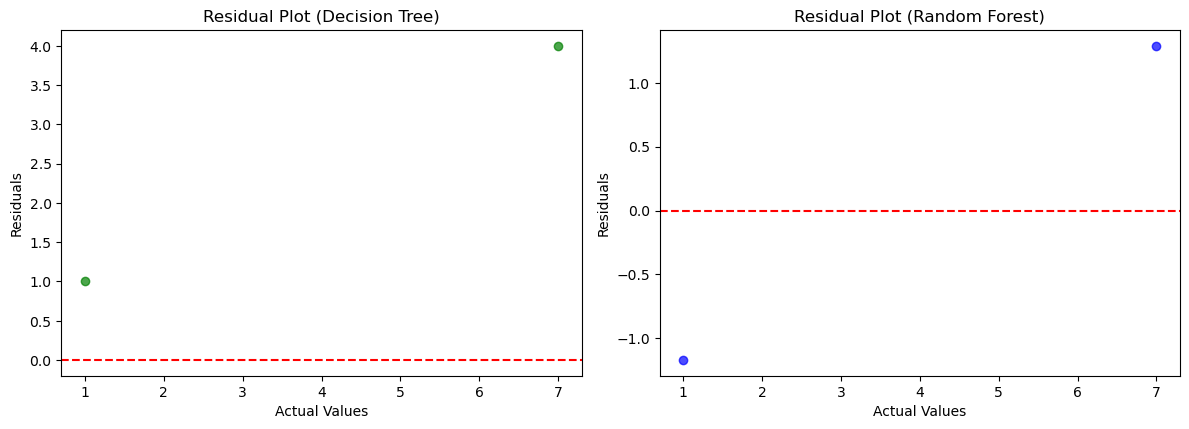

In [87]:
plt.figure(figsize=(12, 8))

# Decision Tree
plt.subplot(2, 2, 3)
residuals_tree = y_test - tree_y_pred
plt.scatter(y_test, residuals_tree, color='green', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

# Random Forest
plt.subplot(2, 2, 4)
residuals_rf = y_test - rf_y_pred
plt.scatter(y_test, residuals_rf, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


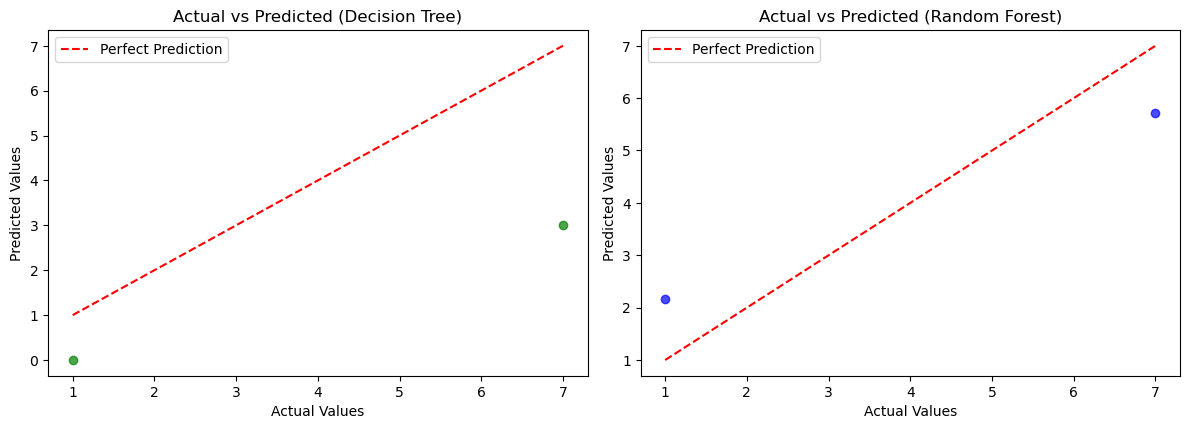

In [88]:
plt.figure(figsize=(12, 8))

# Decision Tree
plt.subplot(2, 2, 1)
plt.scatter(y_test, tree_y_pred, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted (Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Random Forest
plt.subplot(2, 2, 2)
plt.scatter(y_test, rf_y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()


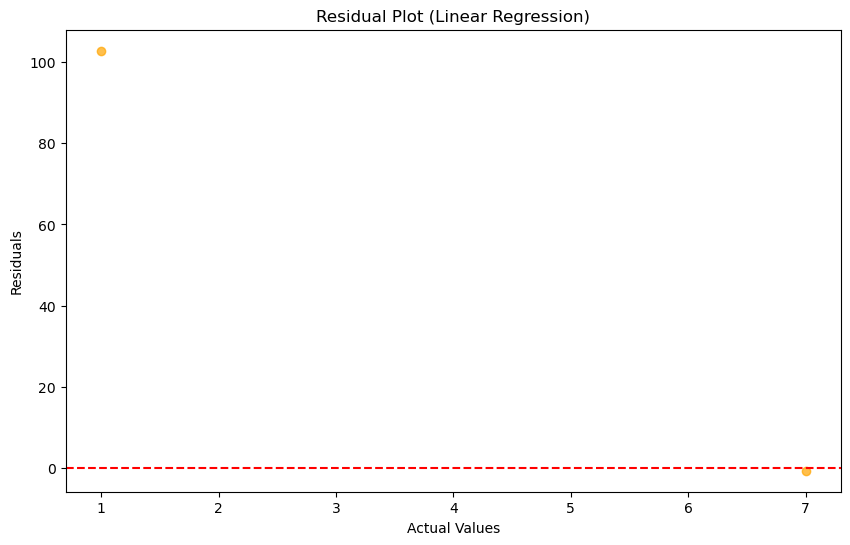

In [92]:
plt.figure(figsize=(10, 6))
residuals_lr = y_test - y_pred
plt.scatter(y_test, residuals_lr, color='orange', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()
